<a href="https://colab.research.google.com/github/suhvin/ybigta-edu/blob/master/ML_%E1%84%80%E1%85%AA%E1%84%8C%E1%85%A6_0801_%EC%84%9C%EA%B8%B0%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/와이빅타/교육세션/submit/ybigta-edu/0801/movies_train.csv')
test = pd.read_csv('/content/drive/MyDrive/와이빅타/교육세션/submit/ybigta-edu/0801/movies_test.csv')

In [31]:
train.shape

(600, 12)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [33]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


# 데이터 전처리

In [34]:
# 결측치가 많은 데이터 제거
train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)

In [35]:
# 감독명 : 너무 다양해서 제거
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

In [36]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

In [37]:
# 상위 5개의 배급사를 제외하고 '기타'로처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [38]:
# 개봉일을 바탕으로 년,월 변수 생성
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)

In [39]:
# 원핫 인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [40]:
train

,time,dir_prev_num,num_staff,num_actor,box_off_num,년,월,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_(주)쇼박스,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,96,0,91,2,23398,2012,11,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,130,2,387,3,7072501,2015,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,123,4,343,4,6959083,2013,6,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,101,2,20,6,217866,2012,7,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,108,1,251,2,483387,2010,11,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,111,1,510,7,1475091,2014,8,1,0,0,...,0,0,0,0,0,0,0,0,0,1
596,127,1,286,6,1716438,2013,3,0,0,1,...,0,0,0,0,0,0,0,1,0,0
597,99,0,123,4,2475,2010,9,0,1,0,...,0,0,0,0,0,0,0,0,0,1
598,102,0,431,4,2192525,2015,5,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# 모델 생성 및 예측(과제부분)

In [49]:
train.columns

Index(['time', 'dir_prev_num', 'num_staff', 'num_actor', 'box_off_num', '년',
       '월', 'distributor_(주)NEW', 'distributor_(주)마운틴픽쳐스',
       'distributor_(주)쇼박스', 'distributor_CJ 엔터테인먼트', 'distributor_기타',
       'distributor_롯데엔터테인먼트', 'genre_SF', 'genre_공포', 'genre_느와르',
       'genre_다큐멘터리', 'genre_드라마', 'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리',
       'genre_서스펜스', 'genre_애니메이션', 'genre_액션', 'genre_코미디',
       'screening_rat_12세 관람가', 'screening_rat_15세 관람가',
       'screening_rat_전체 관람가', 'screening_rat_청소년 관람불가'],
      dtype='object')

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [81]:
from sklearn.ensemble import VotingRegressor, VotingClassifier

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
from sklearn.ensemble import GradientBoostingRegressor

In [119]:
from xgboost import XGBRegressor

In [137]:
from lightgbm import LGBMRegressor

In [151]:
from sklearn.ensemble import StackingRegressor

In [42]:
train_x = train.drop(['box_off_num'],axis= 1)
train_y = train['box_off_num']

In [152]:
linear_reg = LinearRegression()
ridge = Ridge(alpha=0.1)
lasso = Lasso(alpha=0.01)
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.8)

elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.01, l1_ratio=0.8)
)

poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [84]:
# single_models = [
#     ('linear_reg', linear_reg), 
#     ('ridge', ridge), 
#     ('lasso', lasso), 
#     ('elasticnet_pipeline', elasticnet_pipeline), 
#     ('poly_pipeline', poly_pipeline)
# ]

In [85]:
# model = VotingRegressor(single_models, n_jobs=-1)

In [192]:
# rfr = RandomForestRegressor()
model = RandomForestRegressor(random_state=42, n_estimators=1000, max_depth=7, max_features=0.9)
# gbr = GradientBoostingRegressor()
# model = GradientBoostingRegressor(random_state=30, learning_rate=0.01, n_estimators=1000, subsample=0.8)
# xgb = XGBRegressor()
# model = XGBRegressor(random_state=42, learning_rate=0.01, n_estimators=1000, subsample=0.8, max_features=0.8, max_depth=7)
# lgbm = LGBMRegressor()
# model = LGBMRegressor(random_state=42, learning_rate=0.01, n_estimators=1500, colsample_bytree=0.9, num_leaves=15, subsample=0.8)

In [168]:
# stack_models = [
#     ('elasticnet', poly_pipeline), 
#     ('randomforest', rfr), 
#     ('gbr', gbr),
#     ('lgbm', lgbm),
# ]

In [161]:
# model = StackingRegressor(stack_models, final_estimator=xgb, n_jobs=-1)

In [193]:
model.fit(train_x,train_y)
pred = model.predict(test)

# 제출

In [194]:
submission = pd.read_csv('/content/drive/MyDrive/와이빅타/교육세션/submit/ybigta-edu/0801/submission.csv')
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [195]:
submission['box_off_num'] = pred

In [196]:
submission

,title,box_off_num
0,용서는 없다,2.559877e+06
1,아빠가 여자를 좋아해,1.575772e+06
2,하모니,1.421758e+06
3,의형제,1.724972e+06
4,평행 이론,1.049557e+06
...,...,...
238,해에게서 소년에게,1.219221e+05
239,울보 권투부,1.424672e+04
240,어떤살인,2.937655e+05
241,말하지 못한 비밀,2.424075e+04


In [191]:
submission.to_csv('/content/drive/MyDrive/와이빅타/교육세션/submit/ybigta-edu/0801/result/0446.csv',index = False)

# 제출 점수(과제부분)

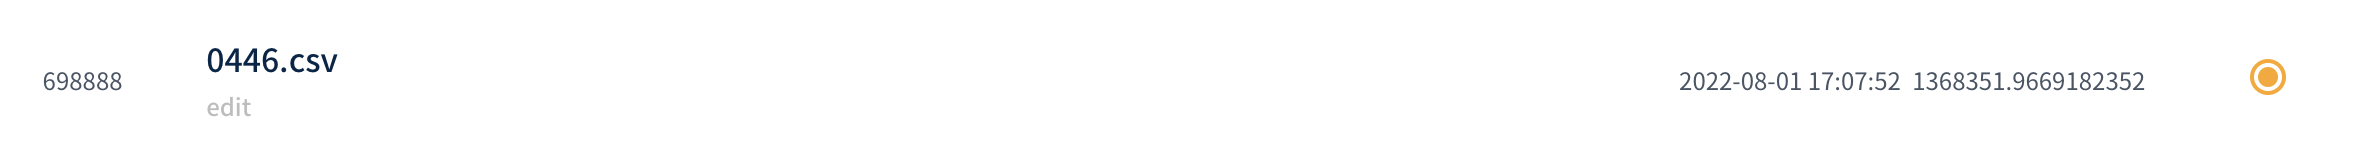